# Importing Libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import keras 
#i will be using keras to build Neural Network

# Here we load the data from keras.datasets

In [13]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() 
X_train.shape, y_train.shape, X_test.shape, y_test.shape

#The Conv2D fucntoin  that is a method from the keras library requires 4 dimension input so we need to reshape it...we can use reshape or expand_dims()
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

## The network..


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 75ms/step - accuracy: 0.6160 - loss: 14.2224
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.8465 - loss: 0.4600
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step - accuracy: 0.8787 - loss: 0.3451
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.8952 - loss: 0.2969
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.9087 - loss: 0.2540
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.9155 - loss: 0.2381
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.9261 - loss: 0.2043
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.9283 - loss: 0.1981
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - accuracy: 0.9382 - loss: 0.1715
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.9401 - loss: 0.1636


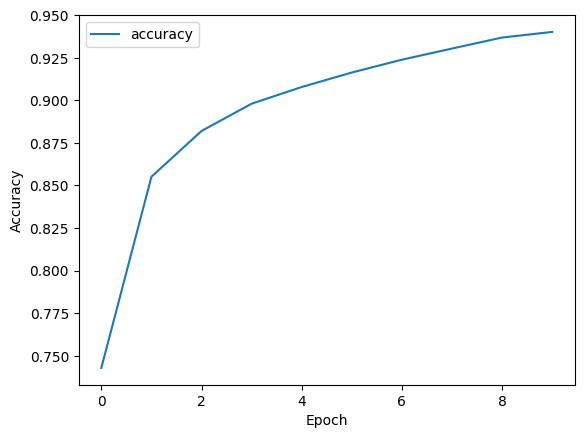

In [14]:
cnn_model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='valid',activation= 'relu', input_shape=[28,28,1]),
                         #here strides means the skips that a kernel does when it moves thru the picture
                         #padding adds a layer of padding so that the kernel takes all values the same number of times
                         keras.layers.MaxPooling2D(pool_size=(2,2)),#we need to decrease the res
                         keras.layers.Flatten(),# to feed it ito nn we need to flatten the pic
                         keras.layers.Dense(units=128, activation='relu'),#this is the neural net layer (input layer)
                         keras.layers.Dense(units=10, activation='softmax')#this is the output layer
])
cnn_model.summary() # see the summary of model
cnn_model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])#here we use adam optimizer because when i used it before it gave really good accuracy because it dynamically changes the learning rate so when we come closer to erivative/slope =  0 it lowers the learning rate
history = cnn_model.fit(X_train, y_train, epochs=10, batch_size=512)# this line trains the model using the adam optimizer so we provide the validation data so that each time it 
plt.plot(history.history["accuracy"], label="accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [15]:
cnn_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8847 - loss: 0.3713


[0.364684134721756, 0.8858000040054321]